![lop](../../images/logo_diive1_128px.png)

<span style='font-size:28px; display:block;'>
<b>
    Create lagged variants
</b>
    
</span>

---
**Notebook version**: `1` (26 Jan 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

Shifts all records in *df* by *lag* records and stores he lagged variants
    as new columns.

For example, lagging the two variables `TA` and `SW_IN` with the settings `lag=[-2, 1]` and `stepsize=1` creates the new variables `TA-2` (two records before `TA`), `TA-1` (one record before `TA`), `TA+1` (one record after `TA`), `SW_IN-2`, `SW_IN-1`, and `SW_IN+1`. Note that the minus sign means "before", the plus sign means "after".

Can be used to investigate correlations between a scalar and the preceding or subsequent records of another scalar.


**Note**:  
The timestamp index of `df` must be regular and complete, i.e., all timestamps of the respective time resolution must be present. Otherwise shifting variables by x records might lead to undesirable results.

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.timeseries import TimeSeries
from diive.pkgs.createvar.laggedvariants import lagged_variants

warnings.filterwarnings("ignore")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Docstring**

In [2]:
help(lagged_variants)

Help on function lagged_variants in module diive.pkgs.createvar.laggedvariants:

lagged_variants(df: pandas.core.frame.DataFrame, lag: list[int, int], stepsize: int = 1, exclude_cols: list = None, verbose: int = 0) -> pandas.core.frame.DataFrame
    Create lagged variants of variables
    
    Shifts all records in *df* by *lag* records and stores he lagged variants
    as new columns.
    
    For example, lagging the two variables `TA` and `SW_IN` with the settings *lag=[-2, 1]*
    and *stepsize=1* creates the new variables `TA-2` (two records before `TA`),
    `TA-1` (one record before `TA`), `TA+1` (one record after `TA`), `SW_IN-2`, `SW_IN-1`,
    and `SW_IN+1`. Note that the minus sign means "before", the plus sign means "after".
    
    Can be used to investigate correlations between a scalar and the preceding or subsequent
    records of another scalar.
    
    Note:
        The timestamp index of `df` must be regular and complete, i.e., all timestamps of the
        respect

</br>

# **Load example data**
- Half-hourly precipitation in `mm`
- Half-hourly air temperature in `°C`

In [3]:
df = load_exampledata_parquet()
locs = (df.index.year == 2022) & (df.index.month == 7) & (df.index.hour >= 10) & (df.index.hour <= 15)
df = df[locs].copy()
df = df[['Tair_f', 'Rg_f', 'NEE_CUT_REF_f']].copy()
df

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.042 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,Tair_f,Rg_f,NEE_CUT_REF_f
TIMESTAMP_MIDDLE,,,
2022-07-01 10:15:00,8.040,315.545,-4.492
2022-07-01 10:45:00,7.940,301.091,-7.062
2022-07-01 11:15:00,8.150,404.348,-8.154
2022-07-01 11:45:00,7.850,133.560,-2.792
2022-07-01 12:15:00,7.690,42.127,-0.193
...,...,...,...
2022-07-31 13:45:00,17.053,851.610,-11.810
2022-07-31 14:15:00,16.910,437.837,-9.269
2022-07-31 14:45:00,16.767,371.047,-2.735


</br>

# **Create lagged variants**

In [4]:
results = lagged_variants(
    df=df,
    lag=[-2, 1],
    stepsize=1,
    exclude_cols=['NEE_CUT_REF_f'],  # Variable(s) that will not be lagged
    verbose=True
)

++ Added new columns with lagged variants for: ['Tair_f', 'Rg_f'] (lags between -2 and 1 with stepsize 1), no lagged variants for: ['NEE_CUT_REF_f']. Shifting the time series created gaps which were then filled with the nearest value.


In [5]:
results

,Tair_f,Rg_f,NEE_CUT_REF_f,.Tair_f-2,.Tair_f-1,.Tair_f+1,.Rg_f-2,.Rg_f-1,.Rg_f+1
TIMESTAMP_MIDDLE,,,,,,,,,
2022-07-01 10:15:00,8.040,315.545,-4.492,8.040,8.040,7.940,315.545,315.545,301.091
2022-07-01 10:45:00,7.940,301.091,-7.062,8.040,8.040,8.150,315.545,315.545,404.348
2022-07-01 11:15:00,8.150,404.348,-8.154,8.040,7.940,7.850,315.545,301.091,133.560
2022-07-01 11:45:00,7.850,133.560,-2.792,7.940,8.150,7.690,301.091,404.348,42.127
2022-07-01 12:15:00,7.690,42.127,-0.193,8.150,7.850,7.803,404.348,133.560,307.276
...,...,...,...,...,...,...,...,...,...
2022-07-31 13:45:00,17.053,851.610,-11.810,15.573,16.463,16.910,409.668,714.519,437.837
2022-07-31 14:15:00,16.910,437.837,-9.269,16.463,17.053,16.767,714.519,851.610,371.047
2022-07-31 14:45:00,16.767,371.047,-2.735,17.053,16.910,16.560,851.610,437.837,381.474


</br>

## Plot some variables

In [6]:
plotdf = df.head(10).copy()

Text(0.98, 0.92, 'Note that lagging variables creates gaps at the start and/or beginning of the dataset.\n Here, gaps are filled with the nearest available value.')

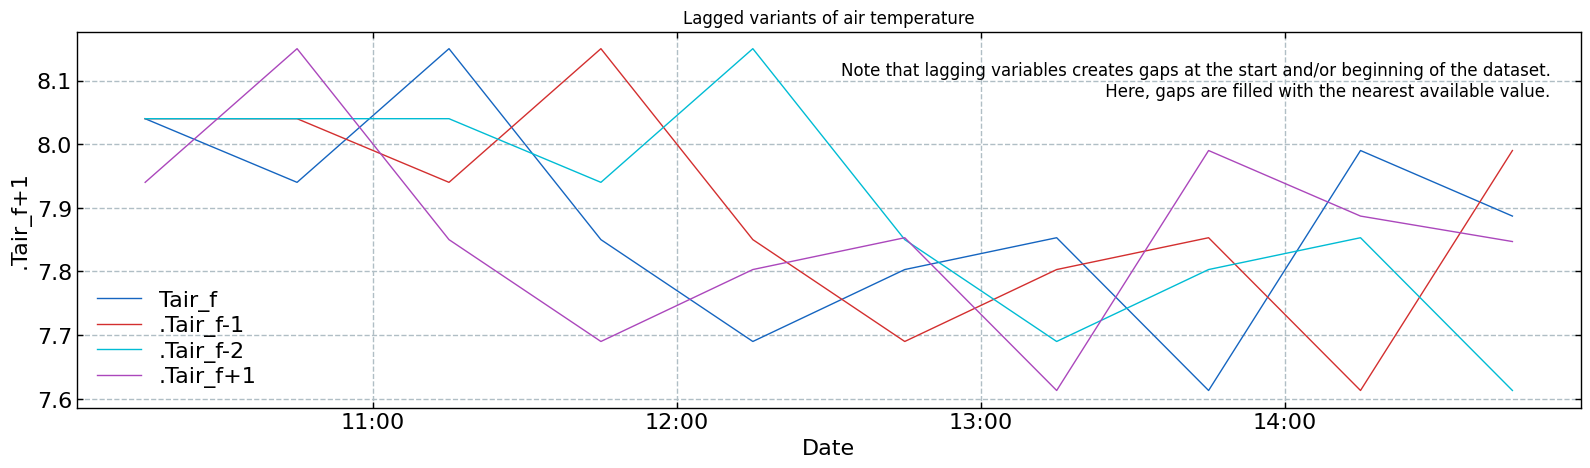

In [7]:
fig = plt.figure(facecolor='white', figsize=(16, 4))
gs = gridspec.GridSpec(1, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.5, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
TimeSeries(ax=ax1, series=plotdf['Tair_f']).plot(color='#1565C0')
TimeSeries(ax=ax1, series=plotdf['.Tair_f-1']).plot(color='#D32F2F')
TimeSeries(ax=ax1, series=plotdf['.Tair_f-2']).plot(color='#00BCD4')
TimeSeries(ax=ax1, series=plotdf['.Tair_f+1']).plot(color='#AB47BC')
ax1.set_title("Lagged variants of air temperature", color='black');
ax1.text(0.98, 0.92, "Note that lagging variables creates gaps at the start and/or beginning of the dataset.\n Here, gaps are filled with the nearest available value.",
        size=12, color='k', backgroundcolor='none', transform=ax1.transAxes,
        alpha=1, horizontalalignment='right', verticalalignment='top')

</br>

# **End of notebook**

In [8]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-26 01:45:35
